In [35]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [36]:
mnist= tf.keras.datasets.mnist # 28 x 28 images of handwritten Digits 0-9

### MODEL ARCHITECTURE:

In [37]:
(X_train,Y_train),(X_test, Y_test)= mnist.load_data()

X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

#1. We'll building a model below Sequential is type of model this is most common one its free flow like images in fig.
#2. we use .Add fn with layer called flattent to reduce the 28x28 multidimentional format for ease of nueral networks
#3. we are making hidden layers in nn which is Dense type so .Dense(no. of nuerons,Trigger Type)
#4. Adding Another Hidden Layer in NN.
#5.Now Adding an output Layer in NN here we dont use dense(no.of nuerons) insted dense(no.of prob dist.) which is10

#Building the model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #This is input layes in NN
model.add(tf.keras.layers.Dense( 128, activation=tf.nn.relu))   #Rectified Linear
model.add(tf.keras.layers.Dense( 128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense( 10, activation=tf.nn.softmax)) #and we use trigger as Softmax for propabilty dist.
#So above we defined the architechture of the model.
          
          
#Now we need to Define some parameters used for the training of the model.
#Loss is the error rate in network which is imp. as netwoks always...
#...gives priority to reducing loss than increasing the accuracy.
          
model.compile(optimizer='adam',                        #we are using the optimizer Adam which the most common type.
              loss='sparse_categorical_crossentropy',  #we are using Spares in this case for cat vs dog we can use binary
             metrics=['accuracy'])
          
#Fitting the model:
model.fit(X_train,Y_train,epochs=3)


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2563 - accuracy: 0.9254
Epoch 2/3
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1057 - accuracy: 0.9676
Epoch 3/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0712 - accuracy: 0.9779


### EVALUATION:

In [38]:
#Nueral networks tends to overfit so to ensure accuracy we check validation score.


val_loss,val_acc=model.evaluate(X_test,Y_test)
print(val_loss,val_acc)
#here our loss=0.094 > epoch3 loss and acc=0.970 < epoch3 acc
#This diff should be slightly in nature if it to far thes its overfit

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0988 - accuracy: 0.9700
0.09881674973331392 0.97


### MODEL PREDICTIONS:

In [41]:
pred= model.predict([X_test])
pred[1]

array([5.2163568e-08, 2.1122693e-04, 9.9978763e-01, 7.7670256e-07,
       7.2940060e-10, 1.3441074e-07, 3.0438159e-09, 6.4192641e-08,
       4.5394895e-08, 9.4931663e-10], dtype=float32)

In [52]:
import numpy as np
print (np.argmax(pred[1]))

2


### TRUE VALUE FROM DATA :

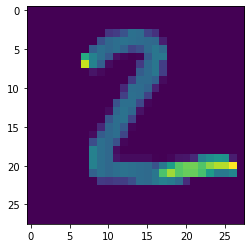

In [43]:
plt.imshow(X_test[1])
plt.show()